<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/30_Finding_Optimal_Client_Clusters_Using_the_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Finding Optimal Client Clusters Using the K-Means Algorithm
</b></div>





# Project Overview

- This project involves utilizing the K-Means algorithm to segment clients of a wholesale distributor of gourmet food products. By analyzing yearly client data, the goal is to identify distinct customer groups to help the company tailor its services and strategies more effectively.

### Dataset Columns

- **Channel**
- **Region**
- **Fresh**
- **Milk**
- **Grocery**
- **Frozen**
- **Detergents_Paper**
- **Delicassen**



# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# *2.Import Dataset*

In [ ]:
df=pd.read_csv('Desktop/ARTIFICIAL INTELLIGENT/Courses/Data+Science+in+Python+-+Unsupervised+Learning/Data/wholesale_clients.csv')
df.head(84)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
79,1,3,1640,3259,3655,868,1202,1653
80,1,3,7005,829,3009,430,610,529
81,2,3,219,9540,14403,283,7818,156
82,2,3,10362,9232,11009,737,3537,2342


# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

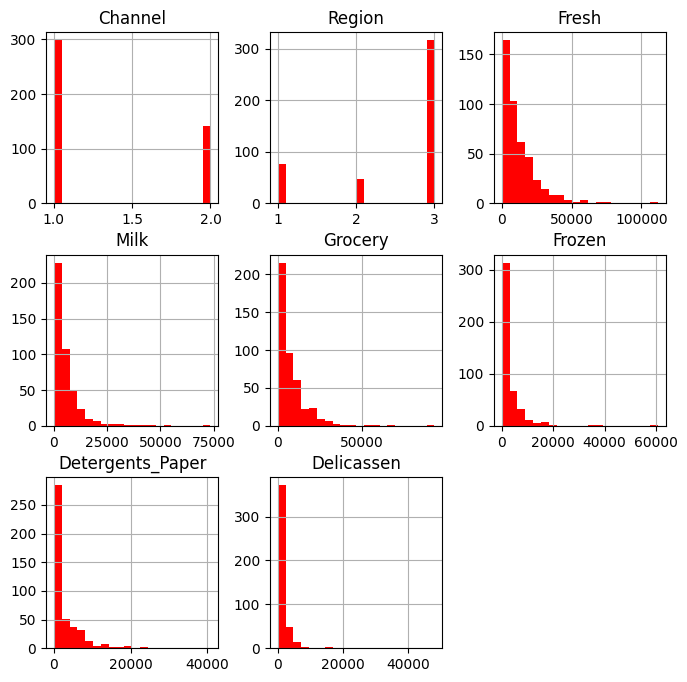

In [ ]:
df.hist(bins=20,figsize=(8,8),color='r')

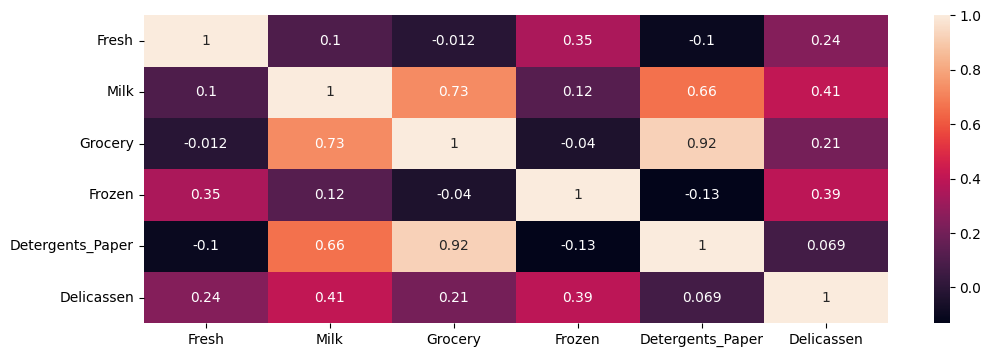

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df.drop(['Channel','Region'], axis=1).corr(), annot=True, ax=ax)

plt.show()

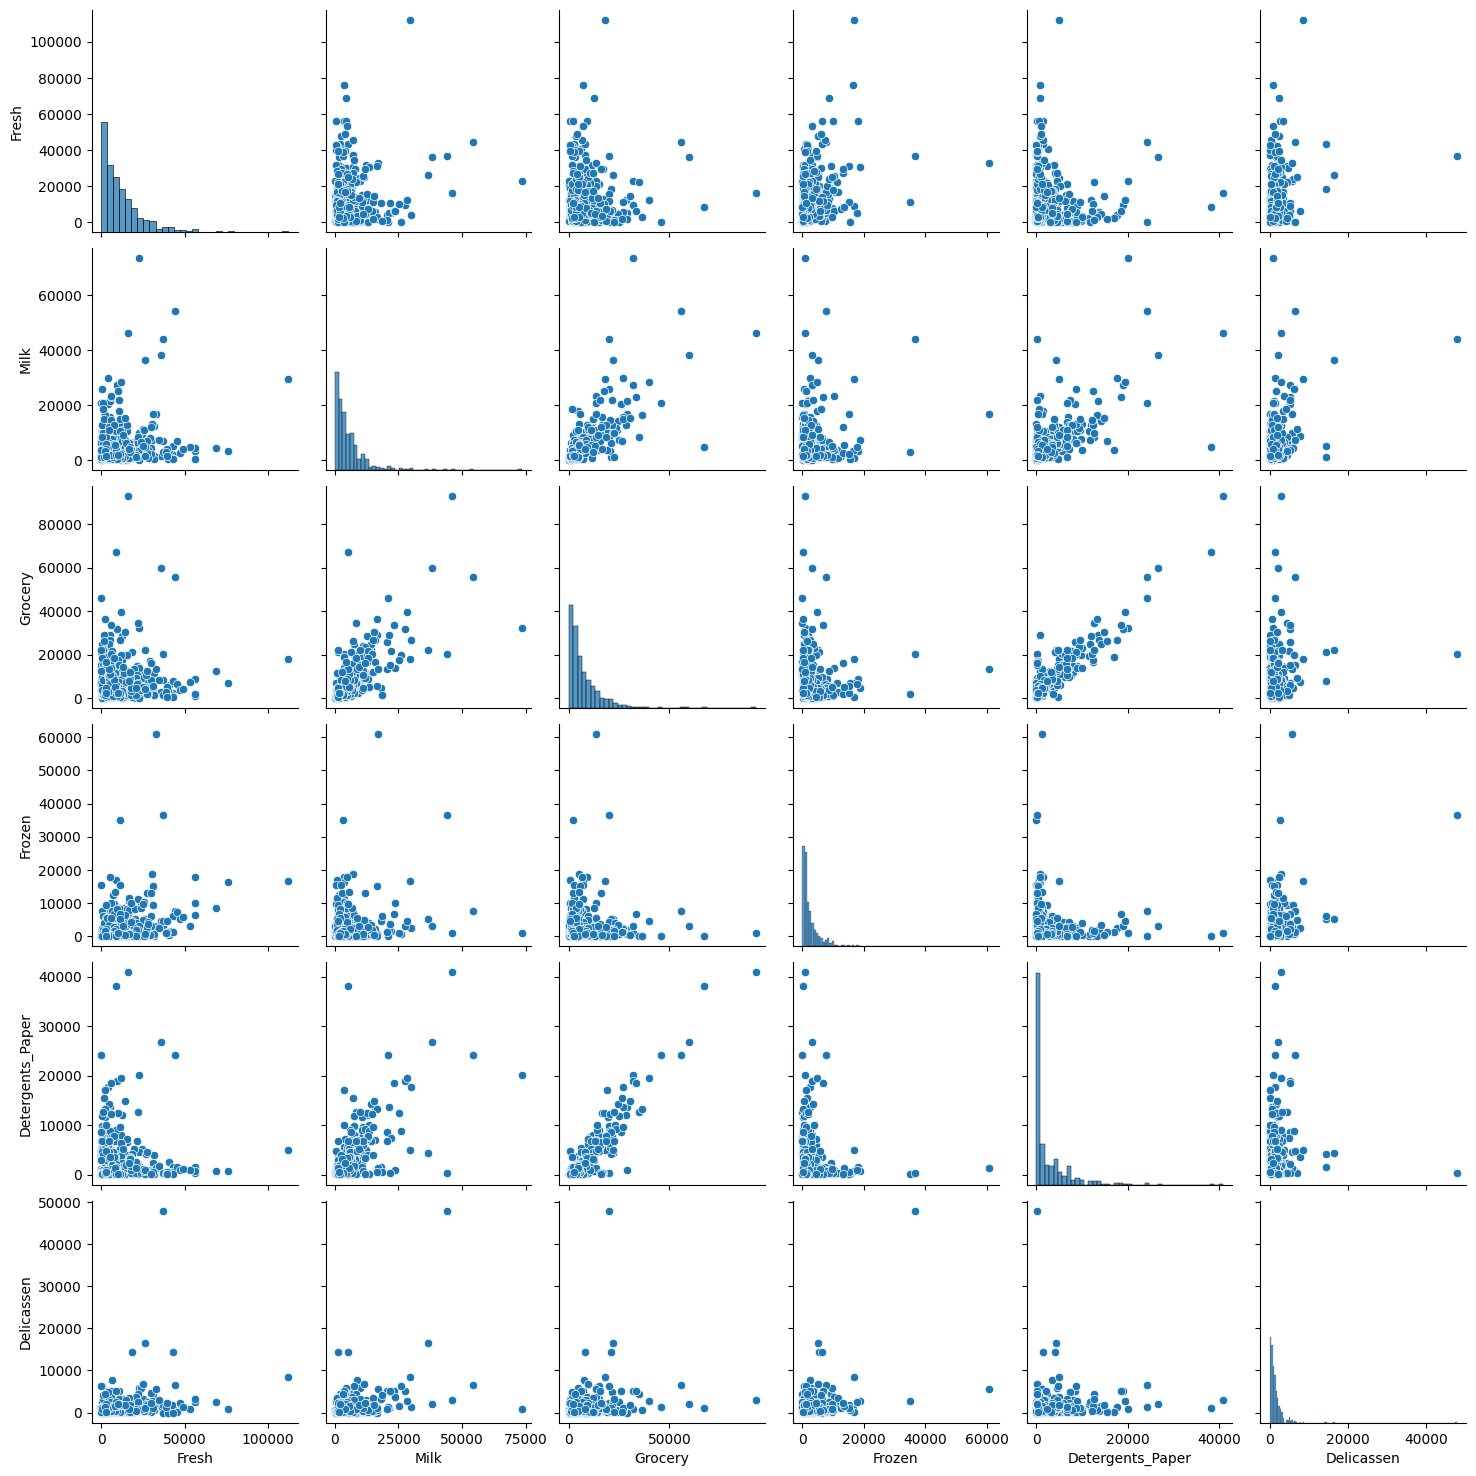

In [ ]:

sns.pairplot(df.drop(['Channel','Region'], axis=1))

# *4.Data Preparation*

In [ ]:
# Remove the Channel
df = df.iloc[:, 2:]
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
df.shape

(440, 6)

In [ ]:
# d. Standardize the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#data_scaled.head()

# *5.Model Training*

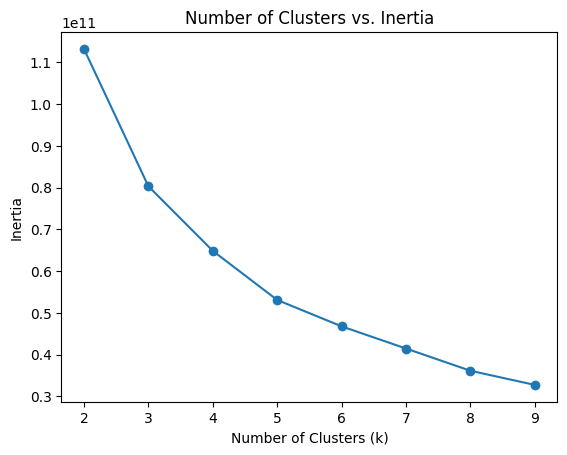

In [ ]:
from sklearn.cluster import KMeans

inertia_values = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

inertia_series = pd.Series(inertia_values, index=range(2, 10))

inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# 5 looks elbow

In [ ]:
k5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
k5.fit(df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# finding the number of customer in each cluster
from collections import Counter
Counter(k5.labels_)

Counter({4: 225, 1: 106, 0: 86, 3: 13, 2: 10})

In [ ]:
dtest=df.copy()
dtest['Cluster'] = k5.fit_predict(df)
dtest = dtest.sort_values('Cluster', ascending=False)
dtest.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,4
260,9193,4885,2157,327,780,548,4
256,11092,5008,5249,453,392,373,4
254,10379,17972,4748,4686,1547,3265,4
252,6623,1860,4740,7683,205,1693,4


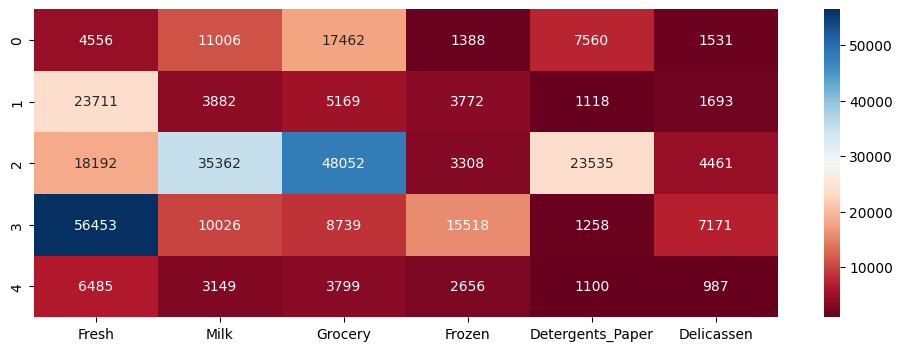

In [ ]:
# visualize cluster
f, ax = plt.subplots(figsize=(12, 4))
c_centers5 = pd.DataFrame(k5.cluster_centers_, columns=df.columns)
sns.heatmap(c_centers5, cmap='RdBu', annot=True,fmt='.0f');

# findings

-Cluster 0: Focuses on higher purchases of milk, grocery, and paper products.
-Cluster 1: Primarily buys fresh and frozen goods.
-Cluster 2: Purchases a wide range of items across all categories.
-Cluster 3: Makes smaller purchases across various product types.
-Cluster 4: Prefers large quantities of frozen and deli items.

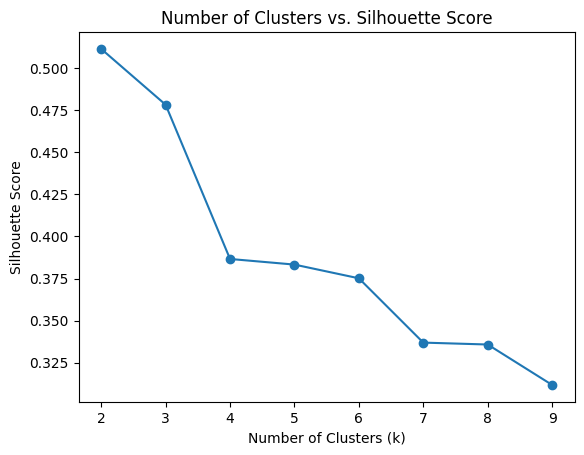

In [ ]:
# controlling silhouette_score


from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_, metric='euclidean', sample_size=None))

silhouette_series = pd.Series(silhouette_scores, index=range(2, 10))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [ ]:
# in this case also 4 looks good cluster number

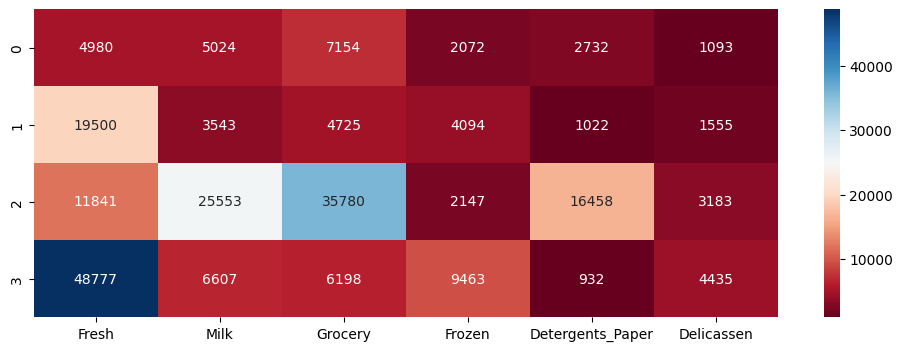

In [ ]:
k4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
k4.fit(df)
f, ax = plt.subplots(figsize=(12, 4))
c_centers4 = pd.DataFrame(k4.cluster_centers_, columns=df.columns)
sns.heatmap(c_centers4, cmap='RdBu', annot=True,fmt='.0f' );

In [ ]:
# lets visualize features by cluster

<Figure size 1000x900 with 0 Axes>

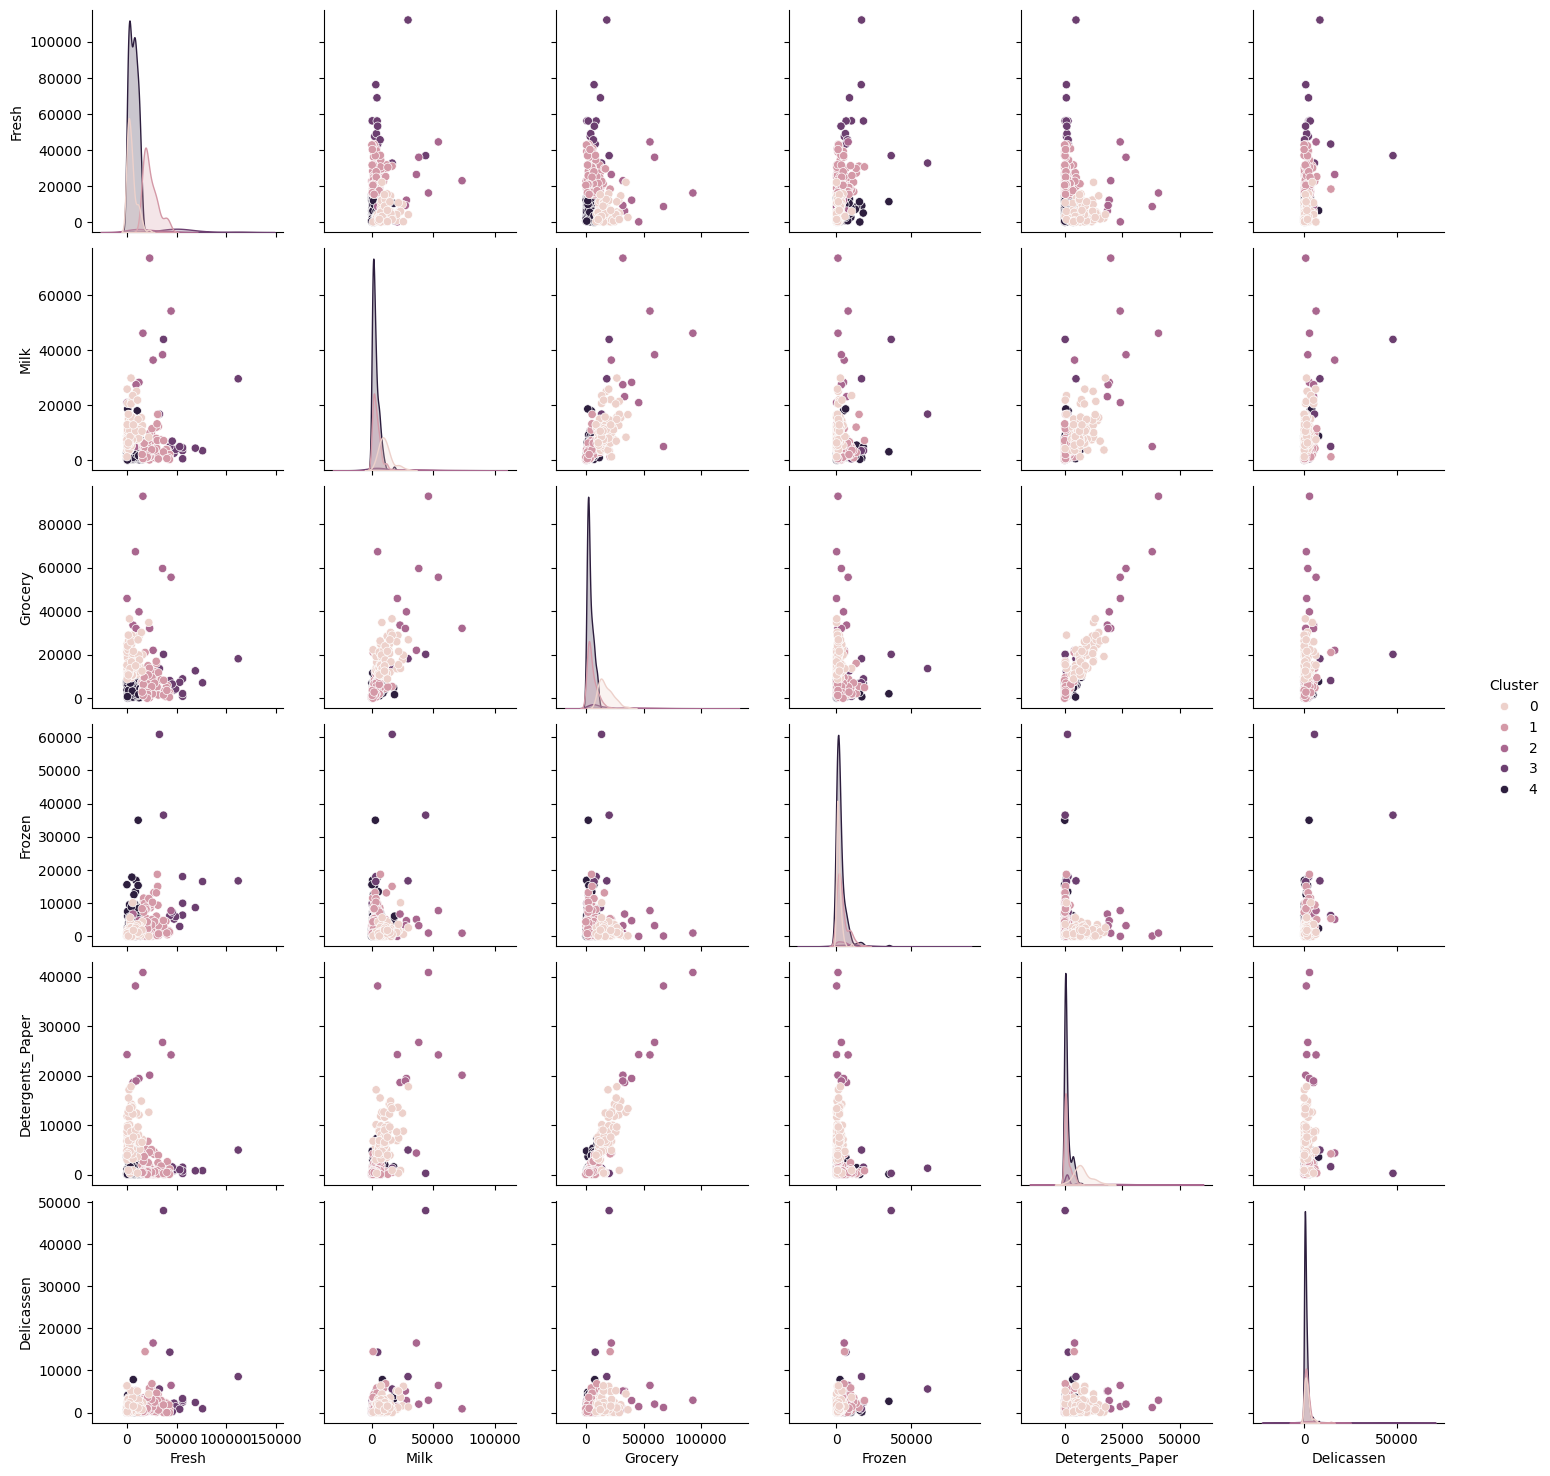

In [ ]:
plt.figure(figsize=(10, 9))
sns.pairplot(dtest,hue='Cluster')
plt.show()

In [ ]:
k4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
k4.fit(df)
dtest1=df.copy()
dtest1['Cluster'] = k4.fit_predict(df)
dtest1 = dtest1.sort_values('Cluster', ascending=False)
dtest1.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
377,38793,3154,2648,1034,96,1242,3
289,42786,286,471,1388,32,22,3
176,45640,6958,6536,7368,1532,230,3
325,32717,16784,13626,60869,1272,5609,3
52,40721,3916,5876,532,2587,1278,3


In [ ]:
def predict_new_cst_clstr(Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen):

    test_data = pd.DataFrame({
        'Fresh': [Fresh],
        'Milk': [Milk],
        'Grocery': [Grocery],
        'Frozen': [Frozen],
        'Detergents_Paper': [Detergents_Paper],
        'Delicassen': [Delicassen]
    })
    k4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
    k4.fit(df)
    cluster = k4.predict(test_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])


    print("Predicted cluster:")
    print(cluster)
    test_data['Cluster'] = cluster
    return test_data

# Example usage:
result = predict_new_cst_clstr(Fresh=1000, Milk=23400, Grocery=3458, Frozen=98754, Detergents_Paper=0, Delicassen=1246)
print(result)


Predicted cluster:
[1]
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0   1000  23400     3458   98754                 0        1246        1
